In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [2]:
S= "HOG"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv(S+".csv")

In [3]:
df= pd.read_csv(S+".csv",index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-10-28,24.680973,24.744440,24.022496,24.133564,2420900
2010-10-29,24.125629,24.466767,24.054228,24.323965,2092200
2010-11-01,24.530244,24.736514,24.046303,24.284307,1646200
2010-11-02,24.633370,25.069711,24.387434,24.911041,1751500
2010-11-03,25.045910,25.379115,24.823774,25.315647,2531600


In [4]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-28 to 2020-10-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2517 non-null   float64
 1   High    2517 non-null   float64
 2   Low     2517 non-null   float64
 3   Close   2517 non-null   float64
 4   Volume  2517 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


<AxesSubplot:xlabel='Date'>

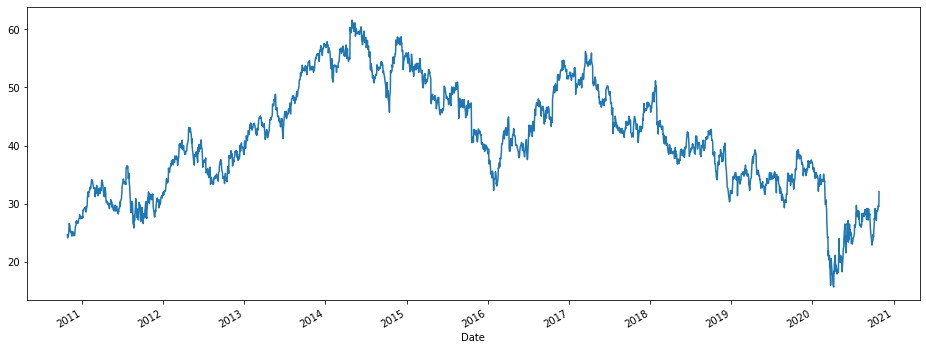

In [6]:
df['Open'].plot(figsize=(16,6))

In [7]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_df)):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1953, 60, 1)

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1953/1953 [==============================] - 20s 10ms/step - loss: 0.0289
Epoch 2/100
1953/1953 [==============================] - 14s 7ms/step - loss: 0.0073
Epoch 3/100
1953/1953 [==============================] - 15s 7ms/step - loss: 0.0068
Epoch 4/100
1953/1953 [==============================] - 15s 8ms/step - loss: 0.0059
Epoch 5/100
1953/1953 [==============================] - 15s 8ms/step - loss: 0.0063
Epoch 6/100
1953/1953 [==============================] - 15s 8ms/step - loss: 0.0058
Epoch 7/100
1953/1953 [==============================] - 15s 7ms/step - loss: 0.0047
Epoch 8/100
1953/1953 [==============================] - 15s 7ms/step - loss: 0.0048
Epoch 9/100
1953/1953 [==============================] - 15s 7ms/step - loss: 0.0051
Epoch 10/100
1953/1953 [==============================] - 15s 7ms/step - loss: 0.0048
Epoch 11/100
1953/1953 [==============================] - 15s 7ms/step - loss: 0.0050
Epoch 12/100
1953/1953 [==============================] - 14s 

1953/1953 [==============================] - 15s 8ms/step - loss: 9.9669e-04
Epoch 97/100
1953/1953 [==============================] - 15s 8ms/step - loss: 0.0014
Epoch 98/100
1953/1953 [==============================] - 15s 8ms/step - loss: 0.0011
Epoch 99/100
1953/1953 [==============================] - 10s 5ms/step - loss: 0.0019
Epoch 100/100
1953/1953 [==============================] - 10s 5ms/step - loss: 0.0011


# Testing

In [17]:
X_test = []
y_test = []
for i in range(60, len(testing_df)):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
predicted_stock_price = regressor.predict(X_test)

In [20]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(444, 1)

In [21]:
y_test

array([[ 2.82860551e-01],
       [ 2.75536911e-01],
       [ 1.93966486e-01],
       [ 2.29574636e-01],
       [ 2.74779147e-01],
       [ 2.78567332e-01],
       [ 2.74779354e-01],
       [ 2.81850409e-01],
       [ 2.79577591e-01],
       [ 2.66698031e-01],
       [ 2.47757546e-01],
       [ 2.49272771e-01],
       [ 2.66950578e-01],
       [ 2.65687883e-01],
       [ 2.70233515e-01],
       [ 2.92709604e-01],
       [ 2.95487536e-01],
       [ 2.91446975e-01],
       [ 2.95992673e-01],
       [ 3.03316211e-01],
       [ 3.01548558e-01],
       [ 3.01295812e-01],
       [ 2.83365725e-01],
       [ 2.95992643e-01],
       [ 3.02053543e-01],
       [ 3.16448227e-01],
       [ 3.09882477e-01],
       [ 3.34378628e-01],
       [ 3.16448290e-01],
       [ 2.92962015e-01],
       [ 3.11902665e-01],
       [ 3.04578873e-01],
       [ 2.87557197e-01],
       [ 2.83730102e-01],
       [ 2.85771226e-01],
       [ 2.93170405e-01],
       [ 2.84240329e-01],
       [ 2.81433864e-01],
       [ 2.4

In [22]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [23]:
predicted_stock_price

array([[34.307384],
       [34.5988  ],
       [34.565777],
       [32.43135 ],
       [32.481956],
       [33.882206],
       [34.504086],
       [34.488586],
       [34.56389 ],
       [34.53768 ],
       [34.21884 ],
       [33.64365 ],
       [33.525055],
       [34.01773 ],
       [34.185726],
       [34.310078],
       [34.908463],
       [35.184498],
       [35.12957 ],
       [35.206665],
       [35.452072],
       [35.511242],
       [35.51789 ],
       [35.04756 ],
       [35.210243],
       [35.47259 ],
       [35.936474],
       [35.89278 ],
       [36.476803],
       [36.208023],
       [35.44637 ],
       [35.704163],
       [35.689213],
       [35.224613],
       [34.939507],
       [34.919422],
       [35.126114],
       [34.95547 ],
       [34.784817],
       [33.77309 ],
       [33.46466 ],
       [32.692333],
       [32.720917],
       [33.25922 ],
       [33.808098],
       [34.17854 ],
       [34.39624 ],
       [35.063145],
       [35.99667 ],
       [36.5851  ],


In [24]:
actual_stock_price.shape

(444, 1)

In [25]:
predicted_stock_price.shape

(444, 1)

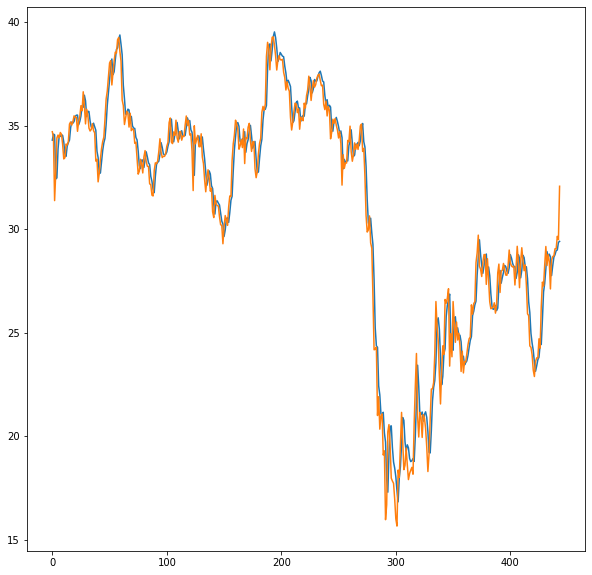

In [26]:
plt.figure(figsize=(10,10))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [27]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

In [28]:
df=df[-444:]
df['Open2']= predicted_stock_price


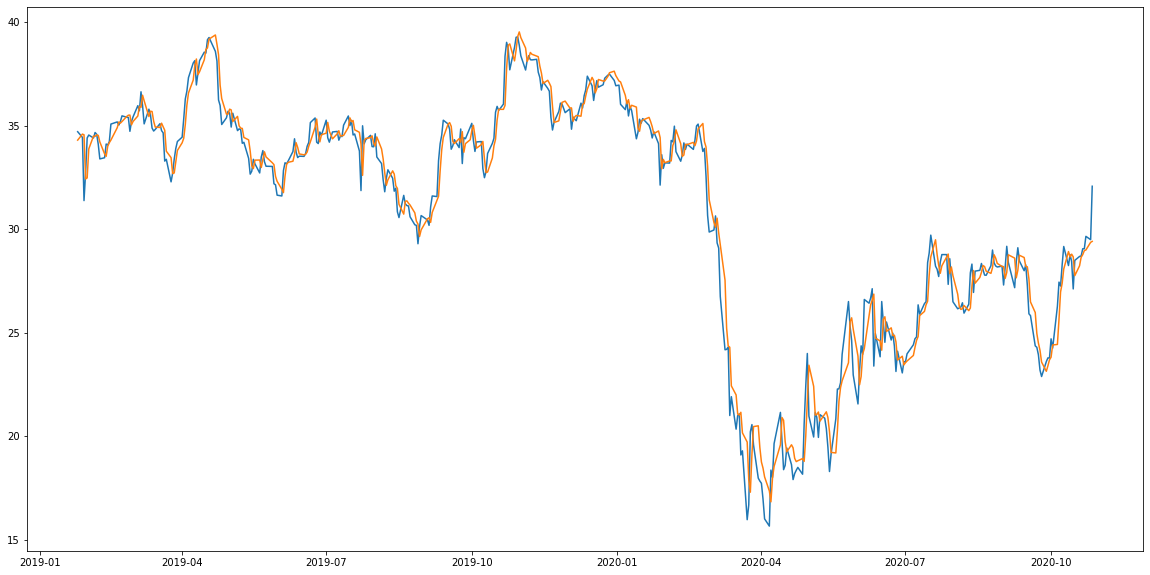

In [29]:

plt.figure(figsize=(20,10))
plt.plot(df['Open'])
plt.plot(df['Open2'])

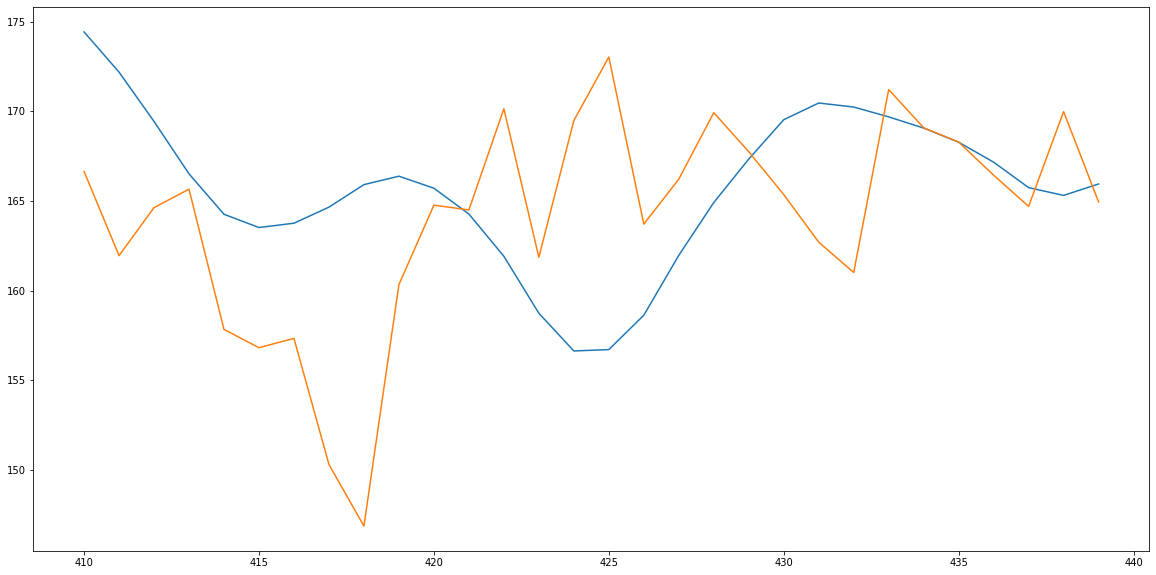

In [30]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [31]:
import pickle
Pkl_Filename = "HOG.pkl"  
sc_file= "HOG_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)